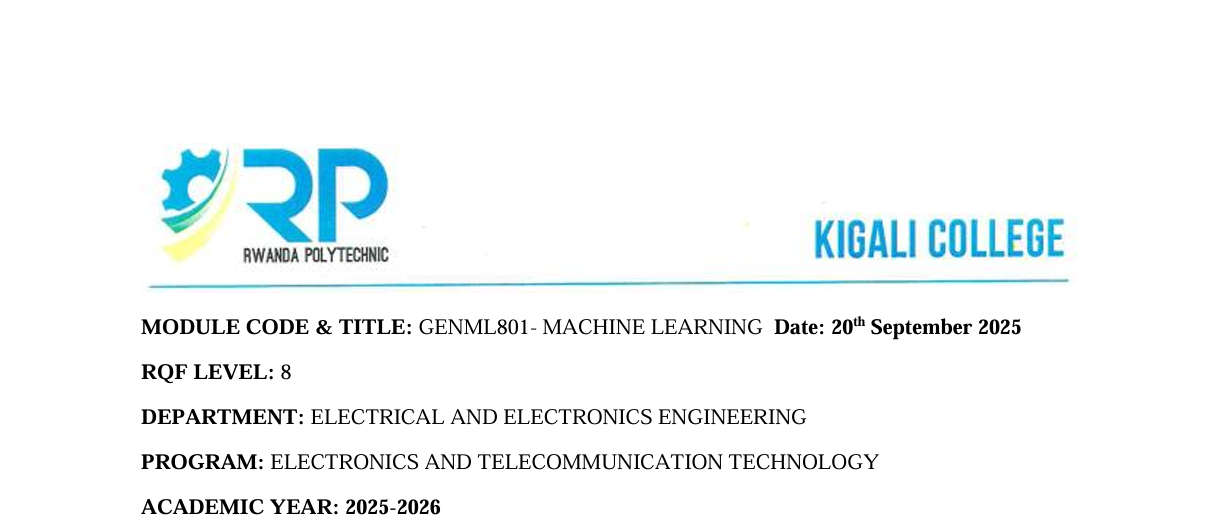

Name: Sabra IKIREZI

Reg Nbr: 25RP18207

Introduction

Title: Machine Learning-Based Traffic Violation Detection System

This project applies Machine Learning techniques to detect and predict traffic violations, aiming to improve road safety and support smarter traffic management. The dataset contains records of different traffic violations with features such as time, location, and type of offense.

The workflow of this project includes:

Importing necessary libraries.

Loading and inspecting the traffic violations dataset.

Performing Exploratory Data Analysis (EDA) to identify violation patterns and trends.

Feature engineering and preprocessing to prepare the dataset for modeling.

Building a Random Forest Classifier to classify violations into categories (e.g., Normal driving vs Violation cases).

Evaluating the model using Accuracy, Precision, Recall, F1-score, and Confusion Matrix.

Deploying the trained model with Flask/Streamlit for real-time prediction and user interaction.

This system aims to enhance traffic safety by providing timely detection of violations, reducing accidents, and supporting law enforcement in monitoring road usage effectively.

step 1 importing necessary libraries 

In [14]:
# ===== 1. Import libraries =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

step 2. Loading and inspecting the dataset.

In [2]:
# ===== 2. Load dataset =====
df = pd.read_csv("traffic_violations_dataset.csv")
print (df)
print("Dataset shape:", df.shape)

print(df.head())

          Date      Time  Location  Driver_Age Vehicle_Type Violation_Type  \
0   2023-01-01  00:00:00  Broadway          38          Bus    Signal Jump   
1   2023-01-02  00:00:00   Main St          67          Bus       Speeding   
2   2023-01-03  00:00:00  Downtown          36        Truck    Signal Jump   
3   2023-01-04  00:00:00   Main St          28          Bus    Signal Jump   
4   2023-01-05  00:00:00   Main St          26          Bus    No Seatbelt   
..         ...       ...       ...         ...          ...            ...   
95  2023-04-06  00:00:00   Main St          61   Motorcycle        Parking   
96  2023-04-07  00:00:00  Downtown          56        Truck       Speeding   
97  2023-04-08  00:00:00  Downtown          22   Motorcycle       Speeding   
98  2023-04-09  00:00:00  Broadway          34          Bus       Speeding   
99  2023-04-10  00:00:00  Broadway          36          Bus        Parking   

    Fine_Amount  
0           144  
1           300  
2        

Step 3. Exploratory Data Analysis

In [3]:
# ===== 3. EDA =====
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            100 non-null    object
 1   Time            100 non-null    object
 2   Location        100 non-null    object
 3   Driver_Age      100 non-null    int64 
 4   Vehicle_Type    100 non-null    object
 5   Violation_Type  100 non-null    object
 6   Fine_Amount     100 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 5.6+ KB
None


In [4]:
print(df.describe())


       Driver_Age  Fine_Amount
count   100.00000   100.000000
mean     42.29000   267.700000
std      15.32628   135.759331
min      18.00000    20.000000
25%      28.00000   143.500000
50%      39.00000   273.500000
75%      56.00000   379.250000
max      69.00000   494.000000


Missing values Handling 

In [5]:
# Missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 Date              0
Time              0
Location          0
Driver_Age        0
Vehicle_Type      0
Violation_Type    0
Fine_Amount       0
dtype: int64


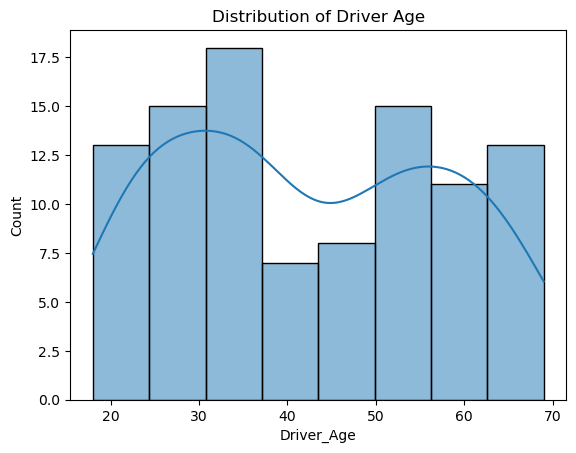

In [6]:
# Histogram - Driver Age
sns.histplot(df["Driver_Age"], kde=True)
plt.title("Distribution of Driver Age")
plt.show()


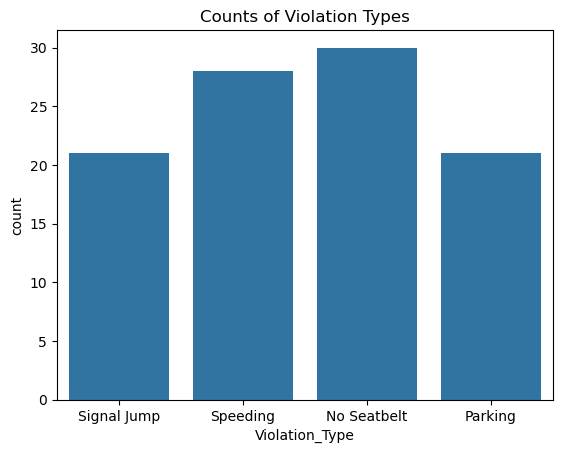

In [7]:
# Violation counts
sns.countplot(x="Violation_Type", data=df)
plt.title("Counts of Violation Types")
plt.show()


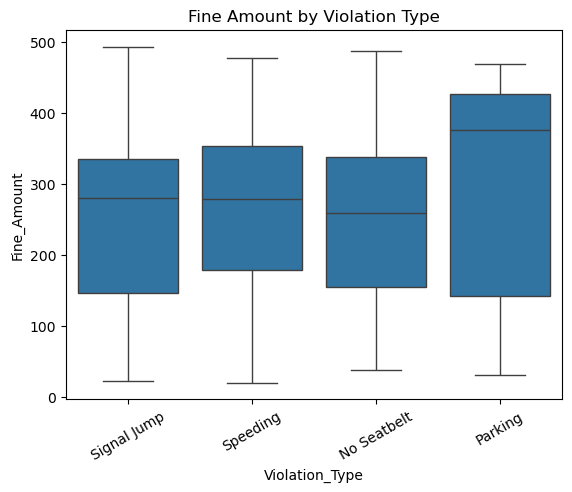

In [8]:
# Boxplot of fines by violation type
sns.boxplot(x="Violation_Type", y="Fine_Amount", data=df)
plt.title("Fine Amount by Violation Type")
plt.xticks(rotation=30)
plt.show()


Correlation heatmap 

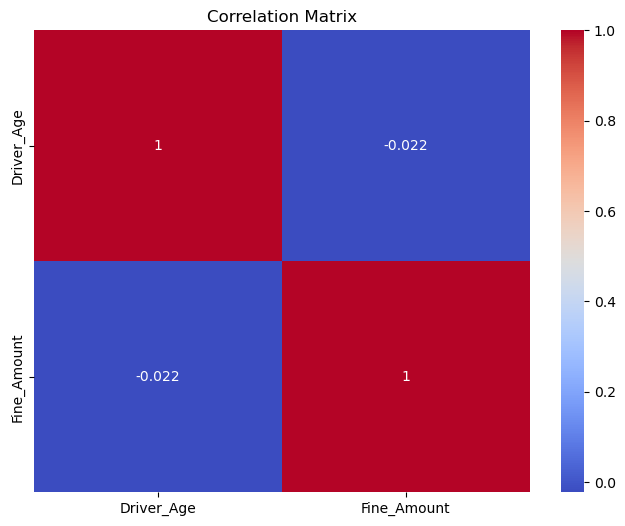

In [9]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Step 4 : Feature Engineering 

In [10]:

# ===== 4. Feature Engineering =====
le = LabelEncoder()
df["Violation_Encoded"] = le.fit_transform(df["Violation_Type"])
df["Vehicle_Encoded"] = le.fit_transform(df["Vehicle_Type"])
df["Location_Encoded"] = le.fit_transform(df["Location"])

X = df[["Driver_Age", "Fine_Amount", "Vehicle_Encoded", "Location_Encoded"]]
y = df["Violation_Encoded"]

scaler = StandardScaler()
X[["Driver_Age", "Fine_Amount"]] = scaler.fit_transform(X[["Driver_Age", "Fine_Amount"]])

# ===== 5. Model Building =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



C:\Users\user\AppData\Local\Temp\ipykernel_13780\1193308829.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["Driver_Age", "Fine_Amount"]] = scaler.fit_transform(X[["Driver_Age", "Fine_Amount"]])


Step 5 Train model 
train Random forest 

In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Step 6 : Model evaluation: confusion matrix  

Accuracy: 0.2
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.17      0.18         6
           1       0.29      0.50      0.36         4
           2       0.00      0.00      0.00         4
           3       0.25      0.17      0.20         6

    accuracy                           0.20        20
   macro avg       0.18      0.21      0.19        20
weighted avg       0.19      0.20      0.19        20



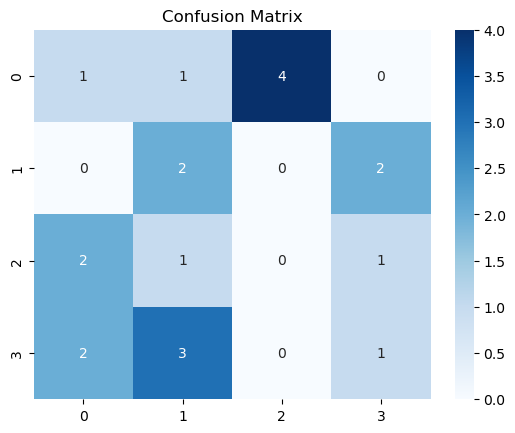

In [12]:

# ===== 6. Evaluation =====
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

Step 7: Model Saving 

In [13]:

# ===== 7. Save Model for Deployment =====
import pickle
with open("traffic_violation_model.pkl", "wb") as f:
    pickle.dump(model, f)